# Setup

In [1]:
!pip install ohsome

  Using cached pip-21.0.1-py3-none-any.whl (1.5 MB)
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


# Variables

In [39]:
import geopandas as gpd
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ohsome import OhsomeClient
sns.set_theme(style="darkgrid")

#### working variables

In [3]:
if not os.path.exists('data'):
    os.makedirs('data')

In [4]:
client = OhsomeClient()

ohsome has timeout issues on too large intervals of queries or too large areas.
This array is used to make calls at serial time intervals

In [35]:
interval_times=["2020-01-01/2020-01-31/P1W","2020-02-01/2020-02-28/P1W","2020-03-01/2020-03-31/P1W","2020-04-01/2020-04-30/P1W","2020-05-01/2020-05-31/P1W","2020-06-01/2020-06-30/P1W","2020-07-01/2020-07-31/P1W","2020-08-01/2020-08-31/P1W","2020-09-01/2020-09-30/P1W","2020-10-01/2020-10-31/P1W","2020-11-01/2020-11-30/P1W","2020-12-01/2020-12-31/P1W"]

## bounding boxes

In [6]:
codogno=[9.60205,45.20284,9.78676,45.13071]
vo=[11.56277,45.36397,11.74747,45.29204]

### geojson italy

In [7]:
italy_geojson="https://raw.githubusercontent.com/AshKyd/geojson-regions/master/countries/10m/ITA.geojson"
italy_borders = gpd.read_file(italy_geojson)

### Codogno
population: 15.465<br/>
surface: 20 km²


In [8]:
# aggregation for each day (1D)
period = "2020-02-15/2020-05-15/P1D"
tags = "building=*"

In [9]:
response_codogno_buildings = client.elements.count.post(bboxes=codogno, time=period, filter=tags).as_dataframe()

2021-03-31 09:38:53,323     utils   INFO:  NumExpr defaulting to 4 threads.


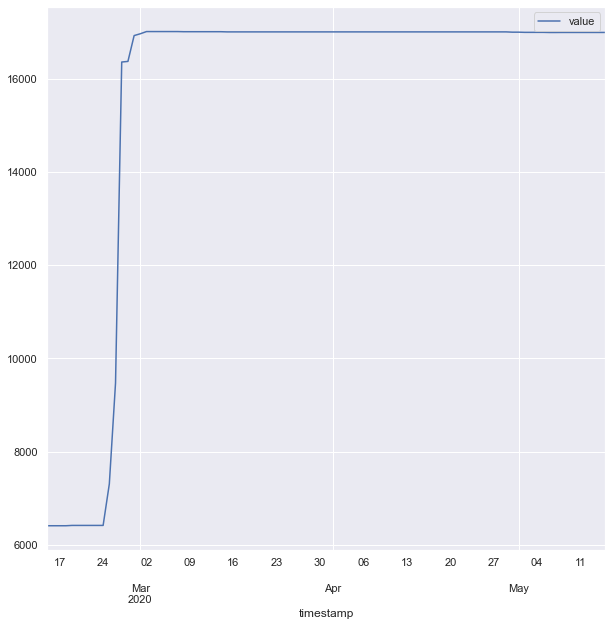

In [10]:
response_codogno_buildings.plot(figsize=(10,10))
plt.show()

In [11]:
response_codogno_buildings.to_csv("data" + os.sep + "codogno_buildings.csv")

### Vo'
population: 3.286<br/>
surface:  20,4 km²

In [12]:
bboxes = vo
time = "2020-02-15/2020-03-15/P1D"
flter = "building=*" # and type:way"

In [13]:
response = client.elements.count.post(bboxes=bboxes, time=time, filter=flter)
response_vo_buildings = response.as_dataframe()

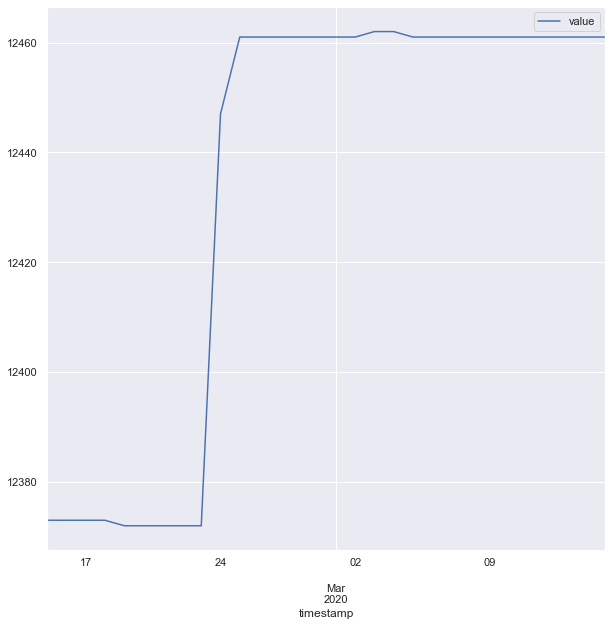

In [14]:
response_vo_buildings.plot(figsize=(10,10))
plt.show()

In [15]:
response_vo_buildings.to_csv("data" + os.sep + "vo_buildings.csv")

In [16]:
time = "2020-01-01/2020-12-31/P1M"
flter = "amenity=pharmacy" 

In [17]:
bpolys = gpd.read_file(italy_geojson)

In [18]:
pharmacy = client.elements.count.groupByBoundary.post(bpolys=bpolys, filter="amenity=pharmacy",time=time)

In [19]:
pharmacy_df = pharmacy.as_dataframe()

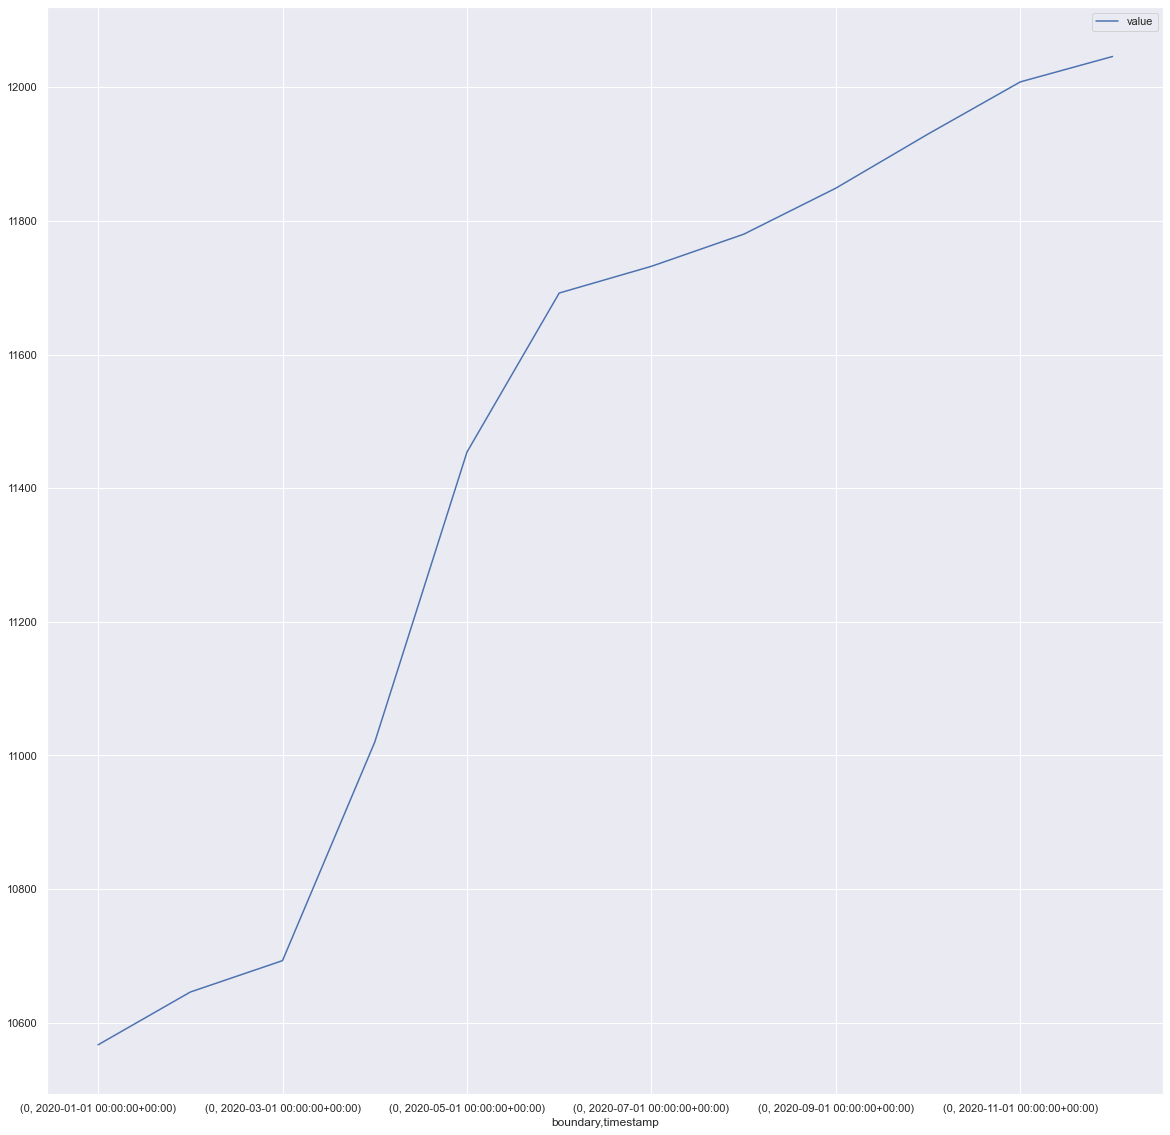

In [20]:
pharmacy_df.plot(figsize=(20,20))
plt.show()

In [21]:
pharmacy_df.to_csv("data" + os.sep + "phamarcies_in_italy.csv")

# tag covid
*:covid19=*

In [22]:
time = "2020-01-01/2020-12-31/P1M"
flter = "delivery:covid19=* or opening_hours:covid19=* or description:covid19=* or takeaway:covid19=* or access:covid19=*" 

In [23]:
covid_delivery = client.elements.count.groupByBoundary.post(bpolys=italy_borders, filter="delivery:covid19=*",time=time)

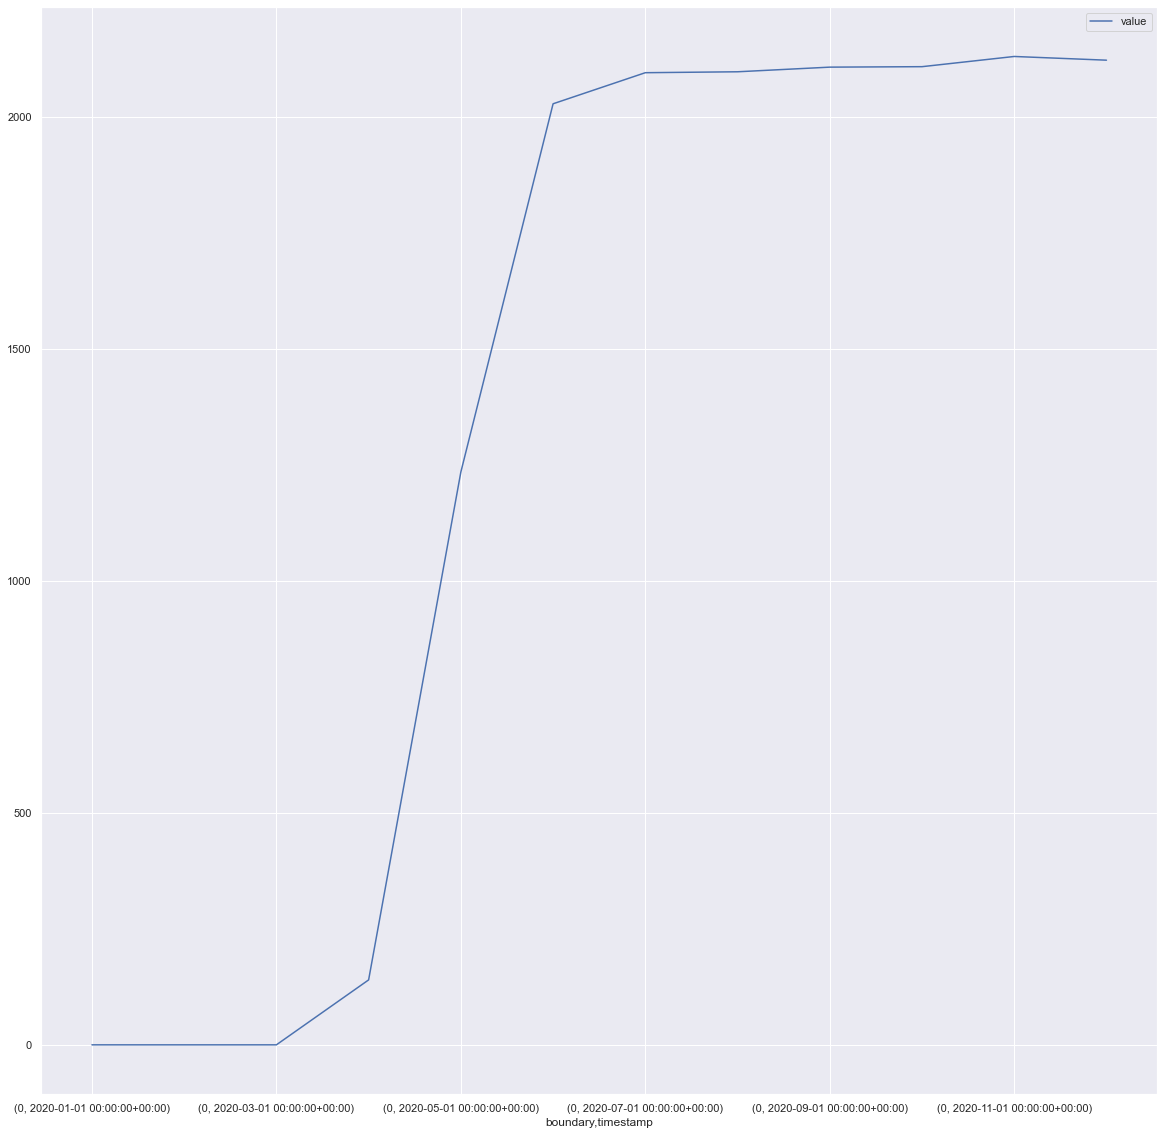

In [24]:
covid_delivery.as_dataframe().plot(figsize=(20,20))
plt.show()

In [25]:
covid_delivery.as_dataframe().to_csv("data" + os.sep + "covid_tags_italy.csv")

### Codogno Users pro month

In [26]:
bboxes = codogno
time = "2020-02-01/2020-06-30/P1M"
total_users_codogno = client.post(bboxes=bboxes, time=time,endpoint="/users/count") #,timeout=450)

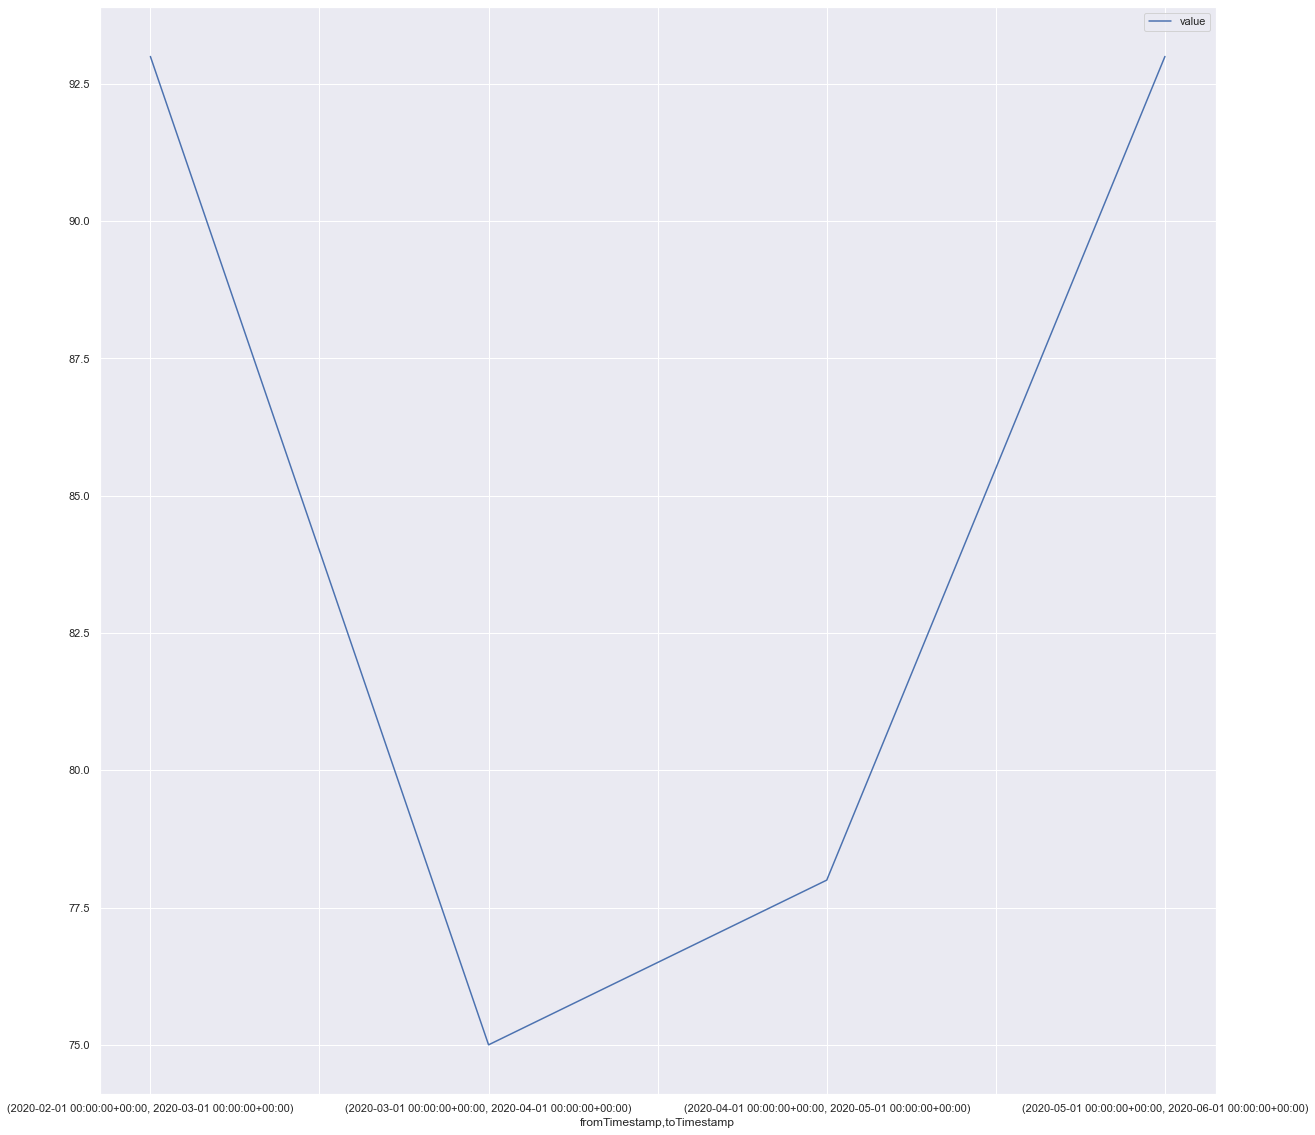

In [27]:
total_users_codogno.as_dataframe().plot(figsize=(20,20))
plt.show()

In [28]:
total_users_codogno.as_dataframe().to_csv("data" + os.sep + "total_users_codogno.csv")

## Vo' users pro Month
### 01/02/2020 - 30/06/2020 

In [29]:
bboxes = vo
time = "2020-02-01/2020-06-30/P1M"
total_users_vo = client.post(bboxes=bboxes, time=time,endpoint="/users/count") #,timeout=450)

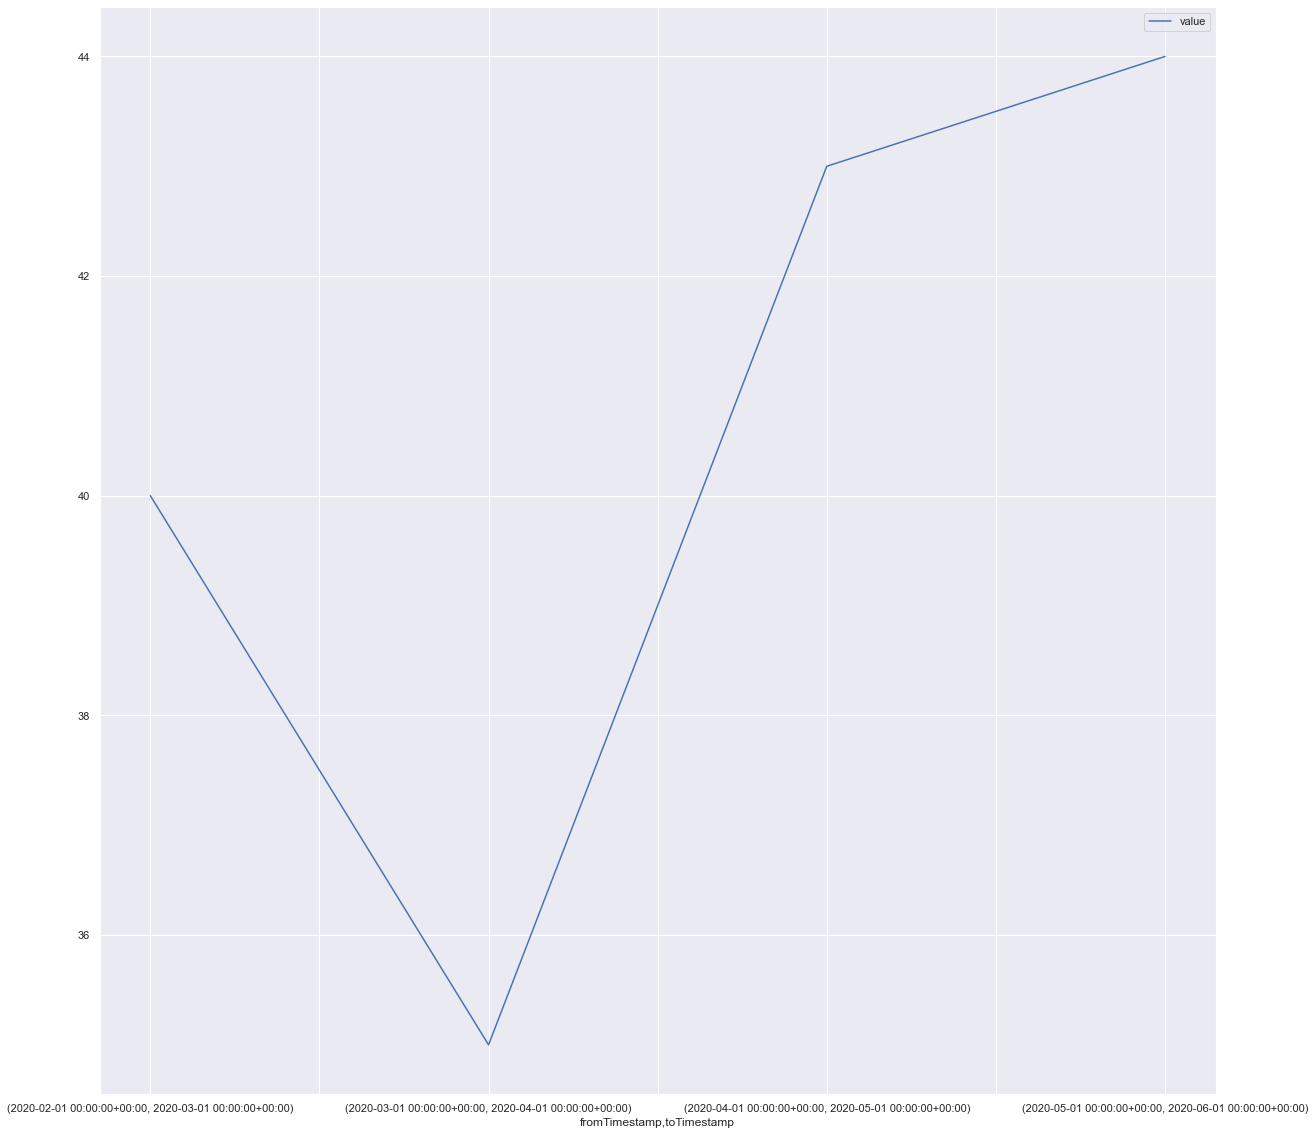

In [30]:
total_users_vo.as_dataframe().plot(figsize=(20,20))
plt.show()

In [31]:
total_users_vo.as_dataframe().to_csv("data" + os.sep + "total_users_vo.csv")

## Contributions for Codogno pro month
### 01/02/2020 - 31/06/2020

In [32]:
contributions_codogno = []

In [36]:
for t in interval_times:
    c = client.post(bboxes=bboxes, time=t,endpoint="contributions/count",showMetadata=True) 
    contributions_codogno.append(c)


In [37]:
table = []
i = 0
for c in contributions_codogno:
    table.append(c.as_dataframe())

In [40]:
codogno_contributions = pd.concat(table).reset_index()

In [41]:
codogno_contributions[codogno_contributions.value == codogno_contributions.value.max()]

,fromTimestamp,toTimestamp,value
11,2020-04-01 00:00:00+00:00,2020-04-08 00:00:00+00:00,304.0
54,2020-04-01 00:00:00+00:00,2020-04-08 00:00:00+00:00,304.0


[]

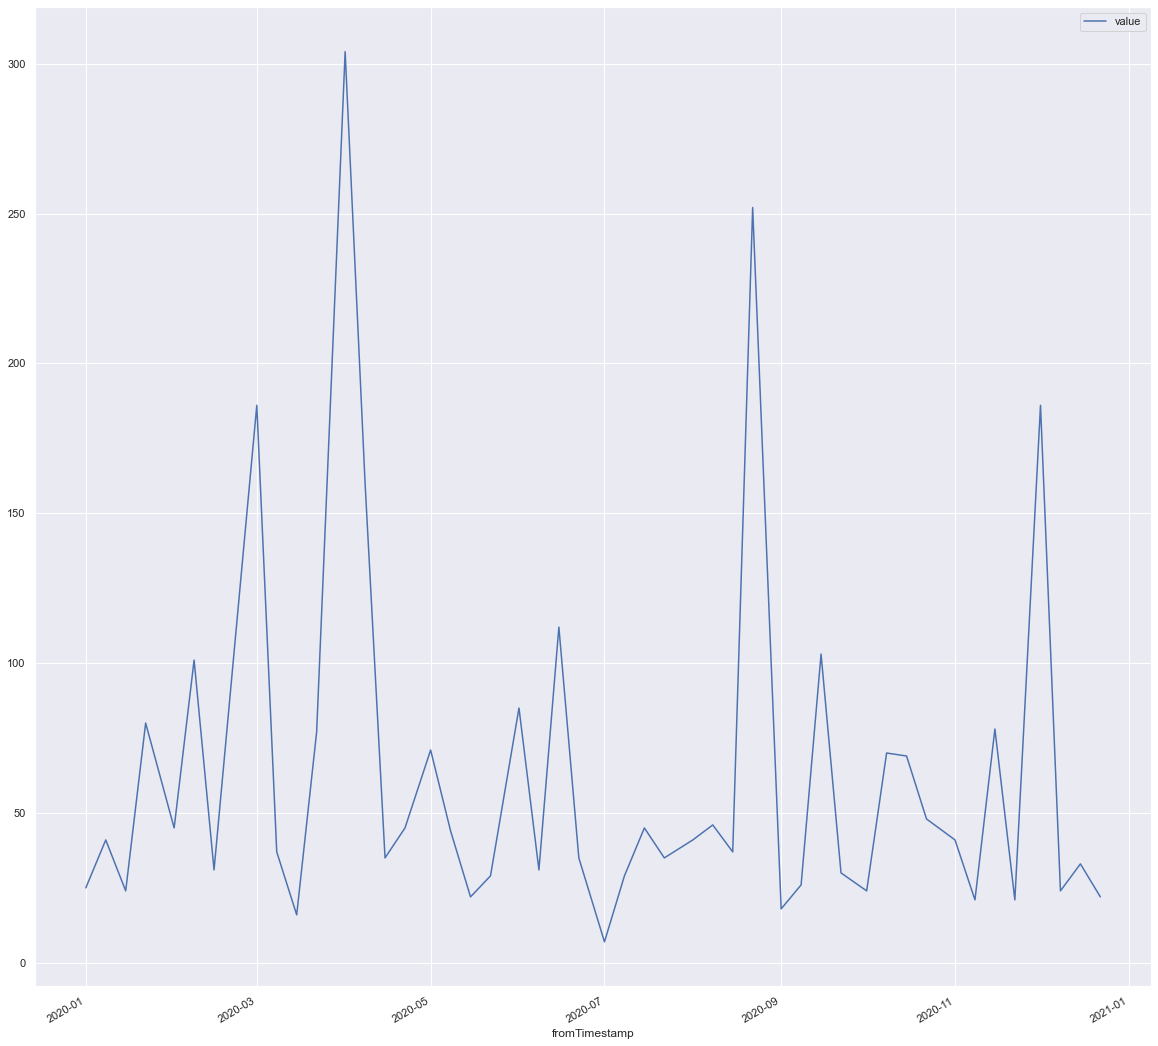

In [42]:
codogno_contributions.plot(figsize=(20,20),x='fromTimestamp',y='value')
plt.plot()

In [43]:
codogno_contributions.to_csv("data" + os.sep + "contributions_codogno.csv")

## Contributions for Vo' pro week (2020)

In [44]:
contributions_vo = []

In [45]:
for t in interval_times:
    c = client.post(bboxes=bboxes, time=t,endpoint="contributions/count",showMetadata=True) 
    contributions_vo.append(c)

In [46]:
table = []
i = 0
for c in contributions_vo:
    table.append(c.as_dataframe())

In [47]:
vo_contributions = pd.concat(table).reset_index()

In [48]:
vo_contributions[vo_contributions.value == vo_contributions.value.max()]

,fromTimestamp,toTimestamp,value
11,2020-04-01 00:00:00+00:00,2020-04-08 00:00:00+00:00,304.0


[]

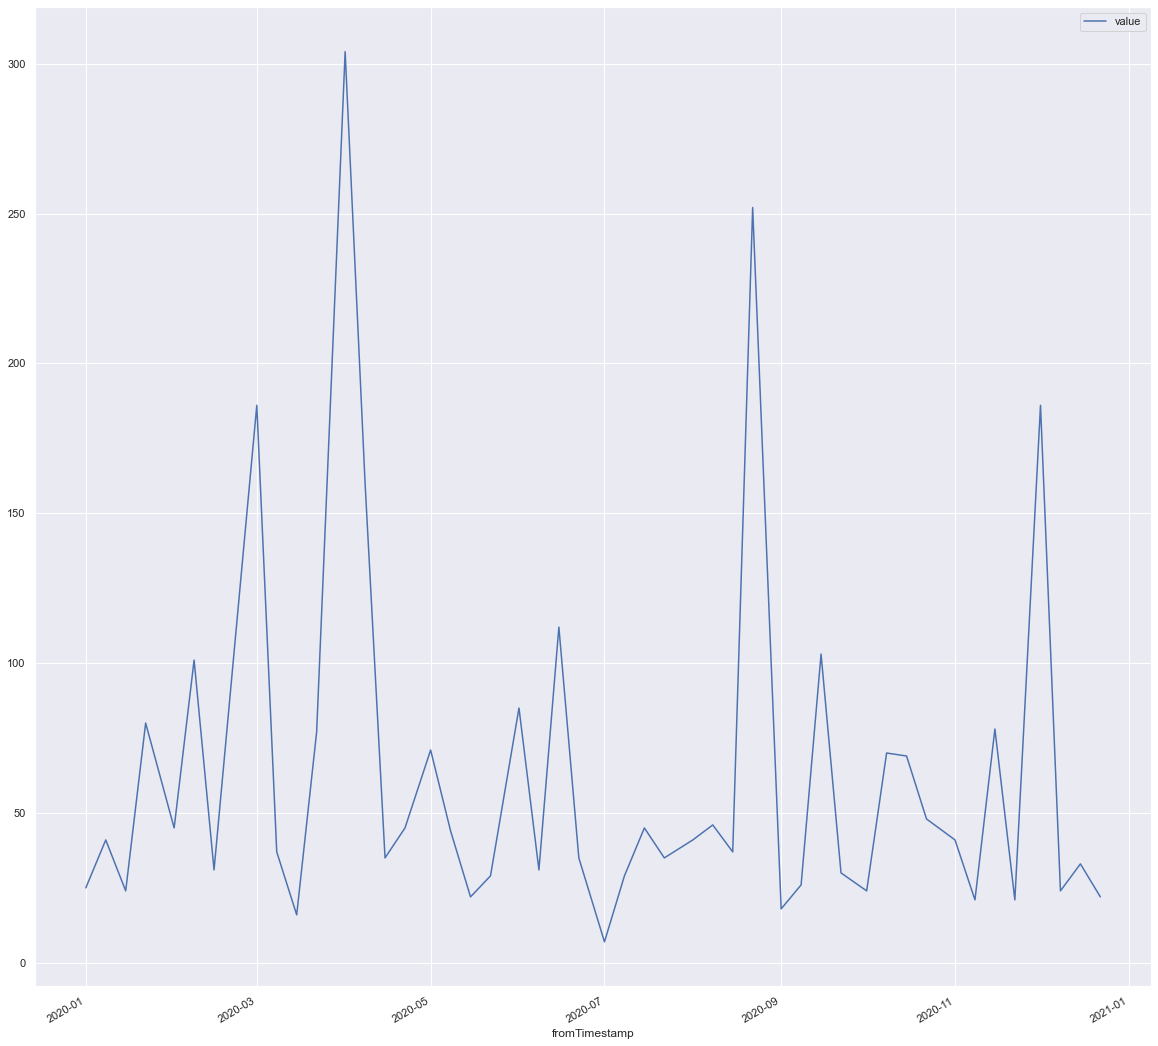

In [49]:
vo_contributions.plot(figsize=(20,20),x='fromTimestamp',y='value')
plt.plot()

In [50]:
vo_contributions.to_csv("data" + os.sep + "contributions_vo.csv")

## geographical distribution of amenity=pharmacy in Italy
### 01-01-2020

In [ ]:
geopharmacies = client.elements.geometry.post(bpolys=bpolys, filter="amenity=pharmacy",
					 time="2020-01-01",
					 properties="tags")
geopharmacies_gpd = geopharmacies.as_geodataframe()

In [ ]:
geopharmacies_gpd.plot(figsize=(30,30))
plt.plot()

In [ ]:
geopharmacies_gpd.to_file("data" + os.sep + "amenity_pharmacy_20200101.geojson")

### 31-12-2020

In [ ]:
geopharmacies = client.elements.geometry.post(bpolys=bpolys, filter="amenity=pharmacy",
					 time="2020-12-31",
					 properties="tags")
geopharmacies_gpd = response.as_geodataframe()

In [ ]:
geopharmacies_gpd.plot(figsize=(30,30))
plt.plot()

In [ ]:
geopharmacies_gpd.to_file("data" + os.sep + "amenity_pharmacy_20201231.geojson")